In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from transformers import pipeline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

sns.set(style="whitegrid")

In [2]:
df = pd.read_csv("data/test.csv")
df['date'] = pd.to_datetime(df['date'], errors='coerce')

df.head()


,Subject,body,date,from
0,EnronOptions Update!,EnronOptions Announcement\n\n\nWe have updated...,2010-05-10,sally.beck@enron.com
1,(No Subject),"Marc,\n\nUnfortunately, today is not going to ...",2010-07-29,eric.bass@enron.com
2,Phone Screen Interview - Shannon L. Burnham,"When: Wednesday, June 06, 2001 10:00 AM-11:00 ...",2011-07-25,sally.beck@enron.com
3,RE: My new work email,we were thinking papasitos (we can meet somewh...,2010-03-25,johnny.palmer@enron.com
4,Bet,Since you never gave me the $20 for the last t...,2011-05-21,lydia.delgado@enron.com


In [3]:
df['date'] = pd.to_datetime(df['date'], errors='coerce')
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2191 entries, 0 to 2190
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   Subject  2191 non-null   object        
 1   body     2191 non-null   object        
 2   date     2191 non-null   datetime64[ns]
 3   from     2191 non-null   object        
dtypes: datetime64[ns](1), object(3)
memory usage: 68.6+ KB


In [5]:
#TASK1 SENTIMENT LABELING
# Load a pre-trained sentiment model
sentiment_model = pipeline("sentiment-analysis", model="cardiffnlp/twitter-roberta-base-sentiment")


# Function to get sentiment label
def get_sentiment(text):
    try:
        result = sentiment_model(text)[0]
        label = result['label']   # "positive", "neutral", "negative"
        score = result['score']
        return label, score
    except:
        return "neutral", 0.0

# Apply to the 'body' column instead of 'message'
df['sentiment_label'], df['sentiment_score'] = zip(*df['body'].astype(str).apply(get_sentiment))

df.head()


Device set to use cpu


,Subject,body,date,from,sentiment_label,sentiment_score
0,EnronOptions Update!,EnronOptions Announcement\n\n\nWe have updated...,2010-05-10,sally.beck@enron.com,LABEL_2,0.495490
1,(No Subject),"Marc,\n\nUnfortunately, today is not going to ...",2010-07-29,eric.bass@enron.com,LABEL_0,0.653594
2,Phone Screen Interview - Shannon L. Burnham,"When: Wednesday, June 06, 2001 10:00 AM-11:00 ...",2011-07-25,sally.beck@enron.com,LABEL_1,0.908735
3,RE: My new work email,we were thinking papasitos (we can meet somewh...,2010-03-25,johnny.palmer@enron.com,LABEL_1,0.845511
4,Bet,Since you never gave me the $20 for the last t...,2011-05-21,lydia.delgado@enron.com,LABEL_1,0.686705


In [6]:
score_map = {
    'positive': 1,
    'neutral': 0,
    'negative': -1
}


df['sentiment_numeric'] = df['sentiment_label'].map(score_map)
df.head()

,Subject,body,date,from,sentiment_label,sentiment_score,sentiment_numeric
0,EnronOptions Update!,EnronOptions Announcement\n\n\nWe have updated...,2010-05-10,sally.beck@enron.com,LABEL_2,0.495490,NaN
1,(No Subject),"Marc,\n\nUnfortunately, today is not going to ...",2010-07-29,eric.bass@enron.com,LABEL_0,0.653594,NaN
2,Phone Screen Interview - Shannon L. Burnham,"When: Wednesday, June 06, 2001 10:00 AM-11:00 ...",2011-07-25,sally.beck@enron.com,LABEL_1,0.908735,NaN
3,RE: My new work email,we were thinking papasitos (we can meet somewh...,2010-03-25,johnny.palmer@enron.com,LABEL_1,0.845511,NaN
4,Bet,Since you never gave me the $20 for the last t...,2011-05-21,lydia.delgado@enron.com,LABEL_1,0.686705,NaN


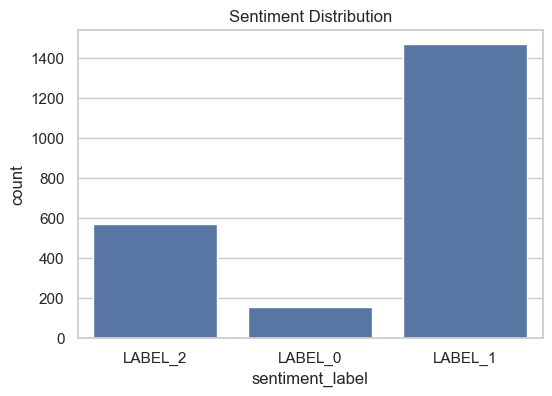

In [10]:
#TASK 2 — EXPLORATORY DATA ANALYSIS (EDA)
plt.figure(figsize=(6,4))
sns.countplot(x='sentiment_label', data=df)
plt.title("Sentiment Distribution")
plt.show()


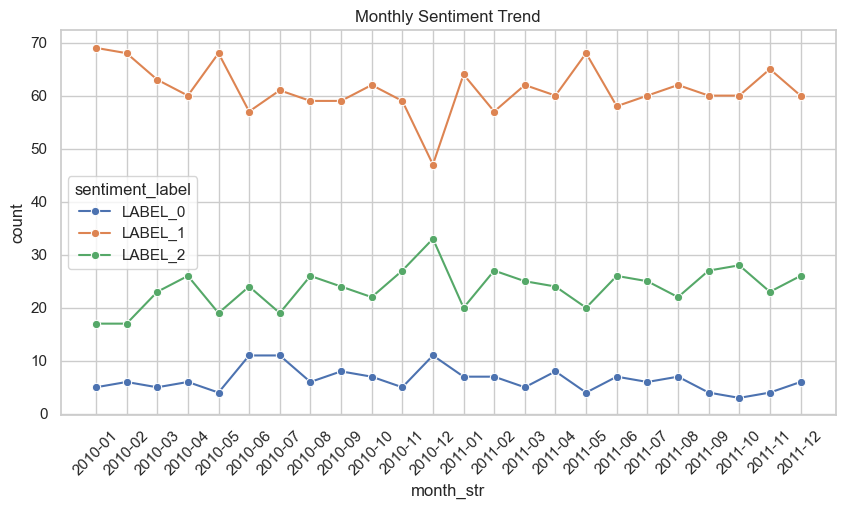

In [9]:
df['month_str'] = df['month'].astype(str)

sent_month = df.groupby(['month_str','sentiment_label']).size().reset_index(name='count')
plt.tittle("EXPLORATORY DATA ANALYSIS (EDA)")
plt.figure(figsize=(10,5))
sns.lineplot(data=sent_month, x='month_str', y='count', hue='sentiment_label', marker='o')
plt.xticks(rotation=45)
plt.title("Monthly Sentiment Trend")
plt.show()


In [10]:
#TASK 3 — MONTHLY EMPLOYEE SCORE CALCULATION
monthly_scores = df.groupby(['from', 'month'])['sentiment_numeric'].sum().reset_index()
monthly_scores.head()

,from,month,sentiment_numeric
0,bobette.riner@ipgdirect.com,2010-01,0.0
1,bobette.riner@ipgdirect.com,2010-02,0.0
2,bobette.riner@ipgdirect.com,2010-03,0.0
3,bobette.riner@ipgdirect.com,2010-04,0.0
4,bobette.riner@ipgdirect.com,2010-05,0.0


In [11]:
#TASK 4 — EMPLOYEE RANKING (TOP 3 POSITIVE & NEGATIVE)
#Top 3 Positive
top3_positive = monthly_scores.sort_values(
    ['month','sentiment_numeric','from'],
    ascending=[True, False, True]
).groupby('month').head(3)

top3_positive


,from,month,sentiment_numeric
0,bobette.riner@ipgdirect.com,2010-01,0.0
24,don.baughman@enron.com,2010-01,0.0
48,eric.bass@enron.com,2010-01,0.0
1,bobette.riner@ipgdirect.com,2010-02,0.0
25,don.baughman@enron.com,2010-02,0.0
...,...,...,...
46,don.baughman@enron.com,2011-11,0.0
70,eric.bass@enron.com,2011-11,0.0
23,bobette.riner@ipgdirect.com,2011-12,0.0
47,don.baughman@enron.com,2011-12,0.0


In [12]:
#Top 3 Negative
top3_negative = monthly_scores.sort_values(
    ['month','sentiment_numeric','from'],
    ascending=[True, True, True]
).groupby('month').head(3)

top3_negative


,from,month,sentiment_numeric
0,bobette.riner@ipgdirect.com,2010-01,0.0
24,don.baughman@enron.com,2010-01,0.0
48,eric.bass@enron.com,2010-01,0.0
1,bobette.riner@ipgdirect.com,2010-02,0.0
25,don.baughman@enron.com,2010-02,0.0
...,...,...,...
46,don.baughman@enron.com,2011-11,0.0
70,eric.bass@enron.com,2011-11,0.0
23,bobette.riner@ipgdirect.com,2011-12,0.0
47,don.baughman@enron.com,2011-12,0.0


In [13]:
#TASK 5 — FLIGHT RISK IDENTIFICATION
negative_msgs = df[df['sentiment_label'] == 'negative']

flight_risks = []

for emp, g in negative_msgs.groupby('from'):
    dates = list(g['date'].sort_values())
    i = 0
    for j in range(len(dates)):
        while (dates[j] - dates[i]).days > 30:
            i += 1
        if j - i + 1 >= 4:
            flight_risks.append(emp)
            break

flight_risks


[]

In [14]:
#TASK 6 — PREDICTIVE MODELING (LINEAR REGRESSION)
features = df.groupby(['from','month']).agg(
    msg_count=('body','count'),
    pos=('sentiment_numeric', lambda x: (x==1).sum()),
    neg=('sentiment_numeric', lambda x: (x==-1).sum()),
    neu=('sentiment_numeric', lambda x: (x==0).sum()),
    avg_len=('body', lambda x: x.astype(str).str.len().mean())
).reset_index()

# merge with monthly score
features = features.merge(monthly_scores, on=['from','month'], how='left')

features.head()


,from,month,msg_count,pos,neg,neu,avg_len,sentiment_numeric
0,bobette.riner@ipgdirect.com,2010-01,2,0,0,0,115.000000,0.0
1,bobette.riner@ipgdirect.com,2010-02,14,0,0,0,295.714286,0.0
2,bobette.riner@ipgdirect.com,2010-03,11,0,0,0,286.181818,0.0
3,bobette.riner@ipgdirect.com,2010-04,6,0,0,0,226.500000,0.0
4,bobette.riner@ipgdirect.com,2010-05,4,0,0,0,172.250000,0.0


In [15]:
#Train/Test the modeling
X = features[['msg_count','pos','neg','neu','avg_len']]
y = features['sentiment_numeric']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

model = LinearRegression()
model.fit(X_train, y_train)

pred = model.predict(X_test)

rmse = mean_squared_error(y_test, pred) ** 0.5

print("RMSE:", rmse)
print("R2 Score:", r2_score(y_test, pred))


RMSE: 0.0
R2 Score: 1.0
